# _**Output of GEOSPACE-PT**_

_Authors: Concetta D'Amato, Niccolò Tubini, Michele Bottazzi and Riccardo Rigon_



License: Creative Commons 4.0

## Before starting

The **output** are stored in [NetCDF](https://en.wikipedia.org/wiki/NetCDF). [Here](https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f) an introduction on how to read a NetCDF file using the python library [xarray](http://xarray.pydata.org/en/stable/). The other output are stored as csv file. 

The **outputs** of LysimeterGEO are:
- Water Suction
- Water Content
- Darcy Velocity
- Run off
- Errors
- Leaf Temperature (sun/shade)
- Evaporation
- Transpiration
- Evapotranspiration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from GEOSPACE_Output import*
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 16,
    "font.size": 16,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())

In [134]:
os.chdir(project_path+'/output/GEOSPACE')
#os.listdir()

In [62]:
file_name = 'JavaTestGEOSPACE_PT_waterstress_11_05_0000.nc'

In [63]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:                 (depth: 11, dualDepth: 11, time: 770)
Coordinates:
  * depth                   (depth) float64 -0.95 -0.85 -0.75 ... -0.05 0.0
  * dualDepth               (dualDepth) float64 -1.0 -0.9 -0.8 ... -0.2 -0.1 0.0
  * time                    (time) datetime64[ns] 2013-12-15T01:00:00 ... 201...
Data variables: (12/19)
    psi                     (time, depth) float64 ...
    psiIC                   (depth) float64 ...
    rootIC                  (depth) float64 ...
    T                       (depth) float64 ...
    theta                   (time, depth) float64 ...
    darcyVelocity           (time, dualDepth) float64 ...
    ...                      ...
    waterVolume             (time, depth) float64 ...
    error                   (time) float64 ...
    topBC                   (time) float64 ...
    bottomBC                (time) float64 ...
    runOff                  (time) float64 ...
    controlVolume           (depth) float64 ...
Attributes:
    Description_of_the_problem:         \nInitial condition hydrostatic no po...
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Free Drainage
    path_top_boundary_condition:        data/Cavone/1/precip_1.csv
    path_bottom_boundary_condition:     data/Cavone/1/Cavone_0.csv
    path_grid:                          data/Grid_NetCDF/Grid_GEOSPACE_230222.nc
    time_delta:                          
    swrc_model:                         VG
    soil_hydraulic_conductivity_model:  Mualem VG no temperature
    interface_conductivity_model:       max

## Precipitation Timeseries

In [64]:
os.chdir(project_path+'/data/Cavone/1')
#os.listdir()

In [65]:
file_name = 'precip_1.csv' 

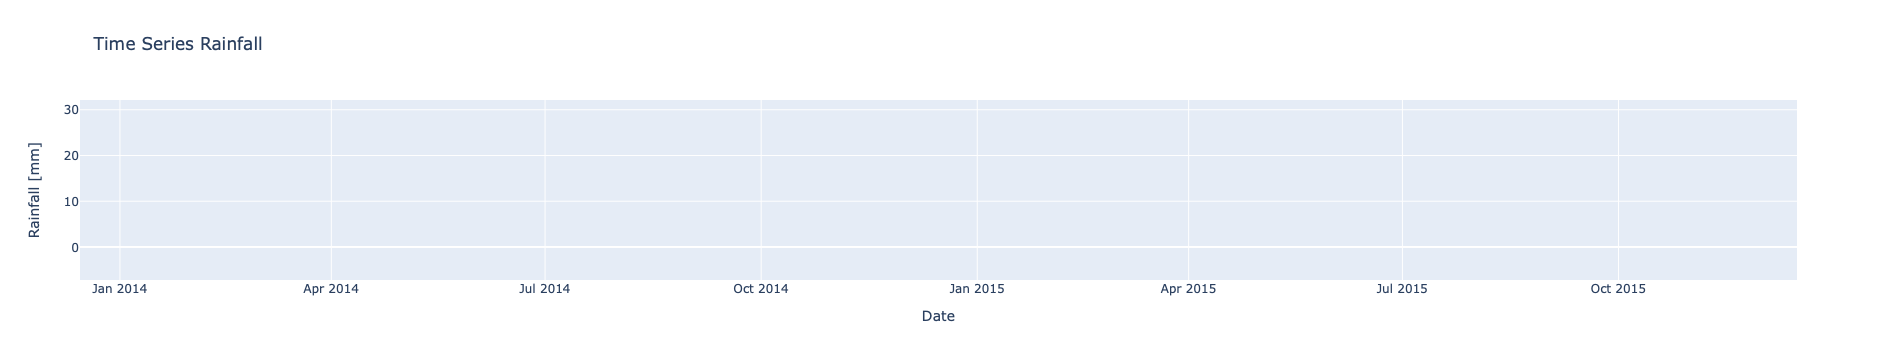

In [66]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Date'
kl.columns.values[1] = 'Rainfall [mm]' 
fig = px.line(kl, x='Date', y='Rainfall [mm]', title='Time Series Rainfall')
fig.show()

<br>

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

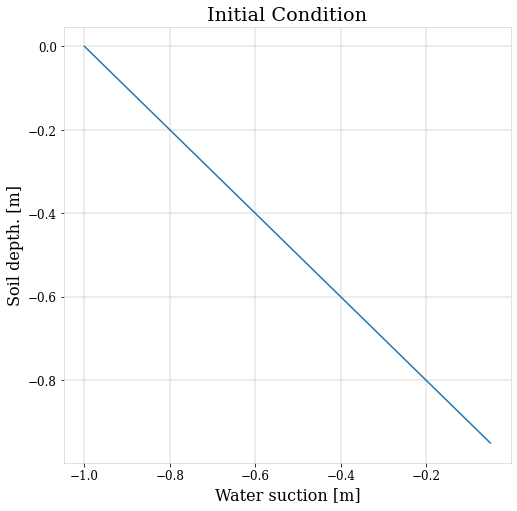

In [67]:
fig = plt.figure(figsize=(8,13/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]')
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

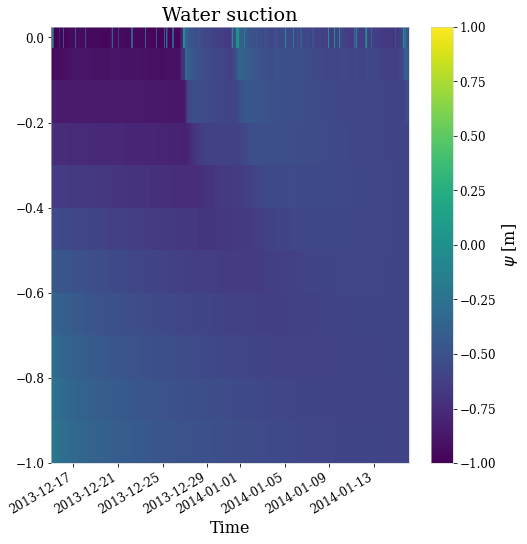

In [68]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')


<br>

## Plot water content  $\theta$

Set the number of control volumes of your domain and the root depth 

In [71]:
root_depth = -0.7
#evaporation_layer_depth = -0.5

 ### Water content $\theta$ among the soil depth in your simulation  

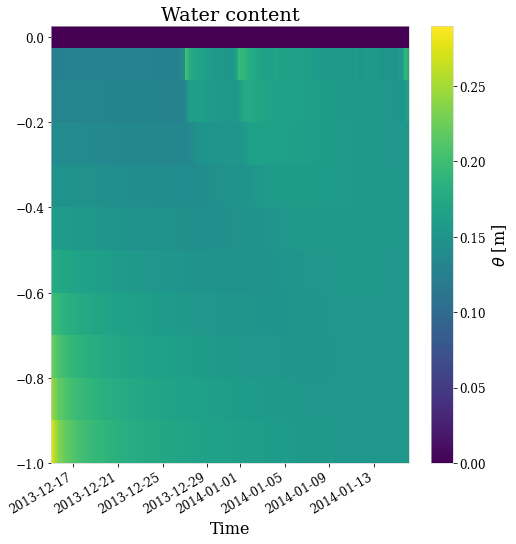

In [72]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


### Plot specifical depth

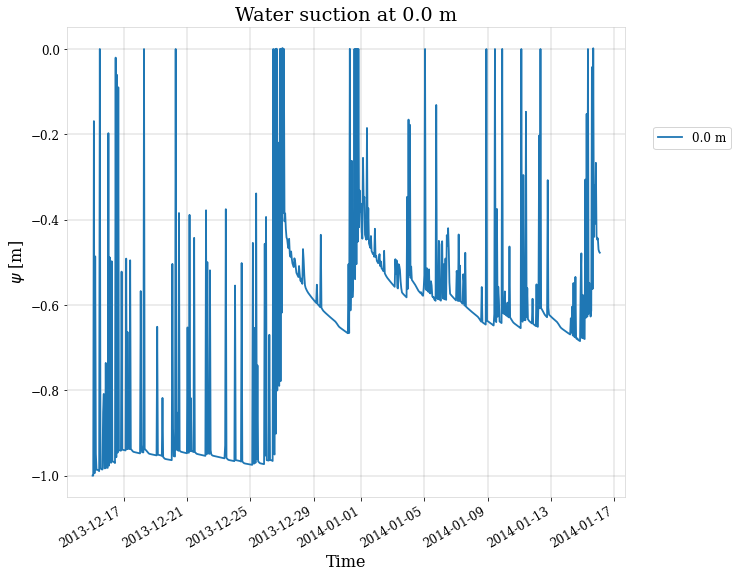

In [73]:
fig = plt.figure(figsize=(10,14/1.618))
ds.psi.sel(depth=ds.depth.values[len(ds.depth)-1], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(ds.depth.values[len(ds.depth)-1])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction at 0.0 m')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

Define a vector of depth 'myDepth' you would plot 

In [74]:
myDepth = [-0.15,-0.30,-0.45,-0.60, -0.75]

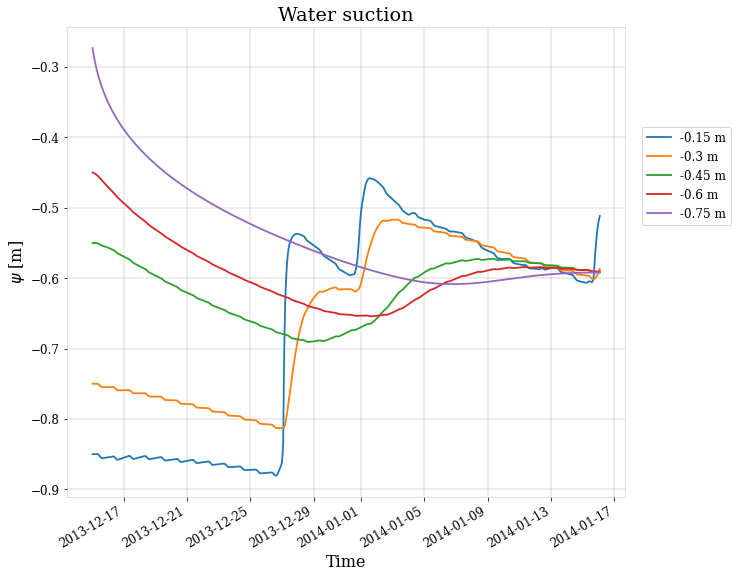

In [75]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.psi.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

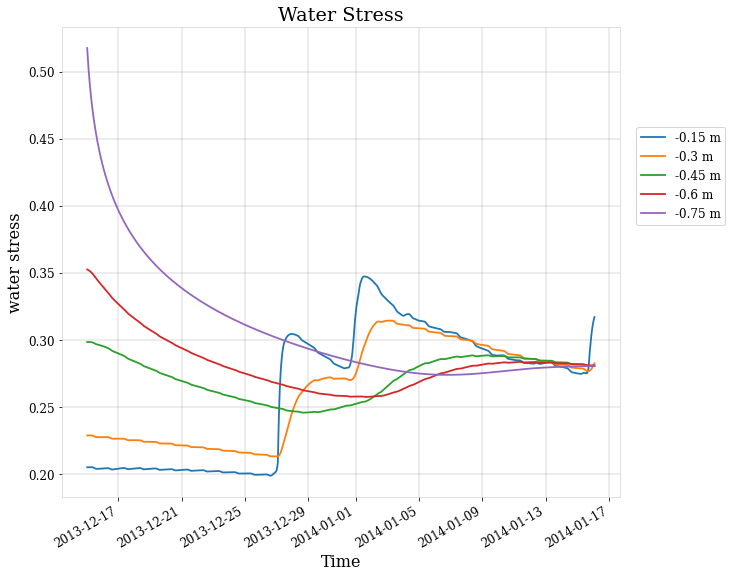

In [76]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.StressWaters.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('water stress')
plt.xlabel('Time')
plt.title('Water Stress')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

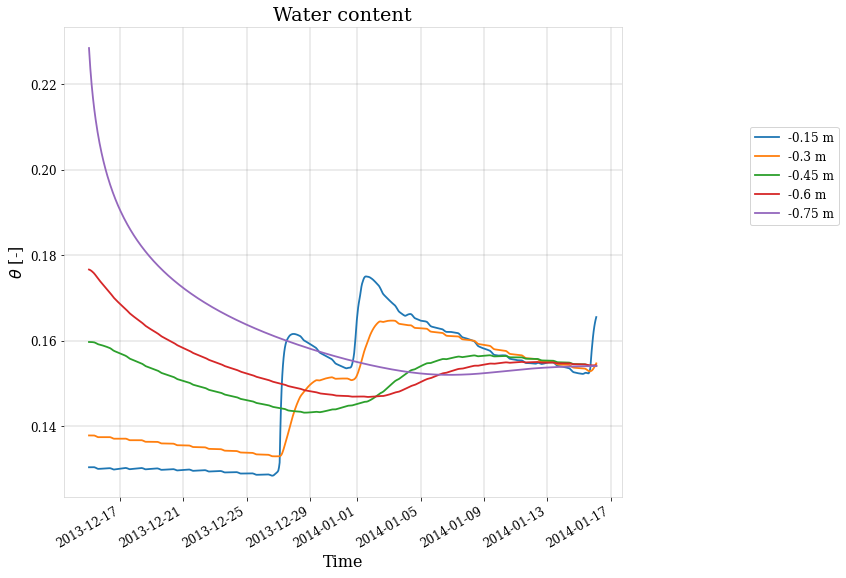

In [77]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [79]:
myDate = ['2013-12-15 01:00','2013-12-15 10:00','2013-12-20 10:00','2013-12-25 10:00', '2014-01-05 10:00', '2014-01-14 10:00']

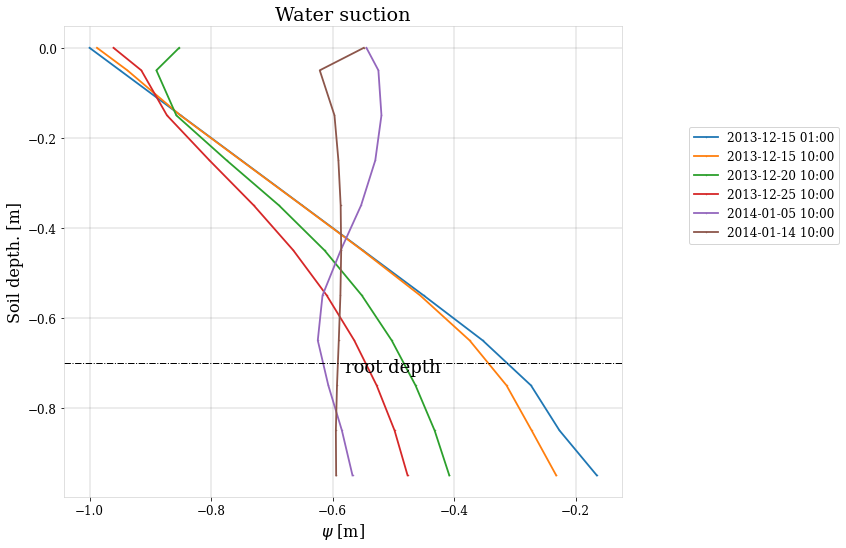

In [80]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
plt.text(-0.5, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
#plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
#plt.text(-0.5, evaporation_layer_depth-0.010, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterSuction.png', dpi=300, bbox_inches = "tight")

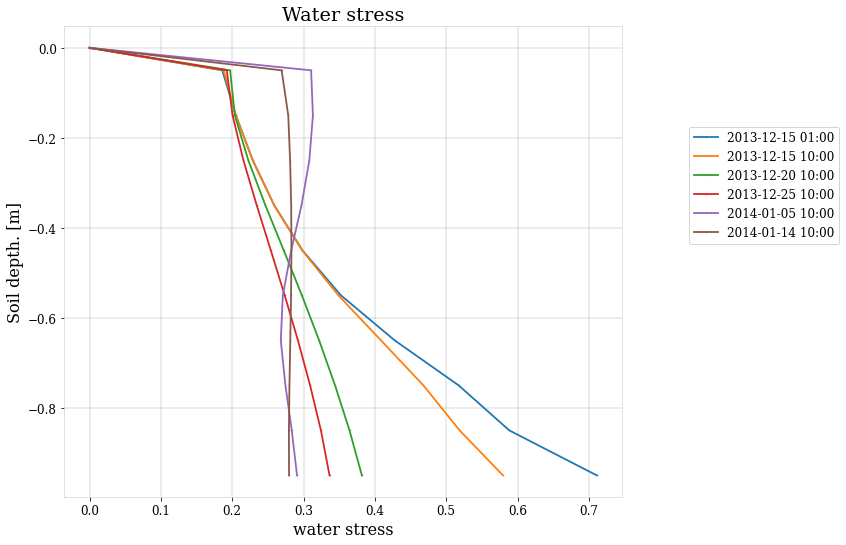

In [135]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.StressWaters.sel(time=myDate[i]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('water stress')
plt.title('Water stress')
plt.legend(bbox_to_anchor=(1.4,0.8))
#plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
#plt.text(-0.5, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
#plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
#plt.text(-0.5, evaporation_layer_depth-0.010, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterSuction.png', dpi=300, bbox_inches = "tight")

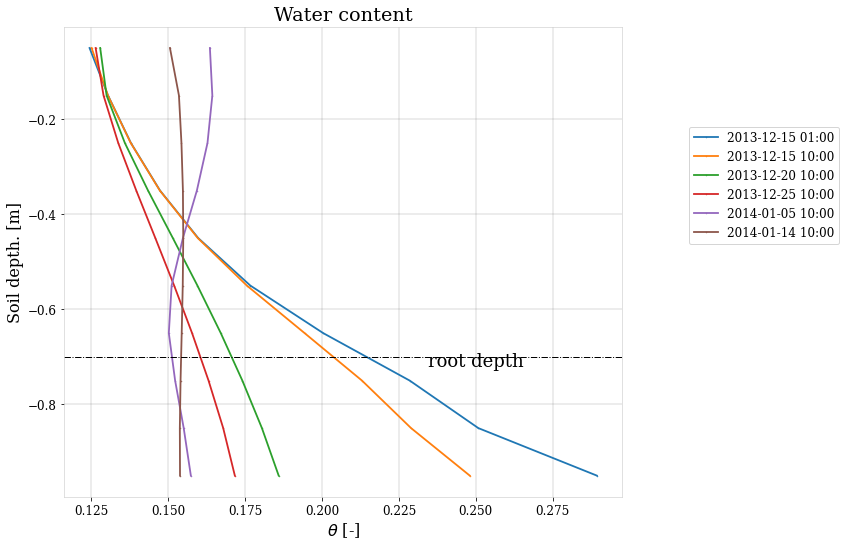

In [82]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.axhline(y=root_depth, xmin=0, xmax=1,color='black',linewidth=1, linestyle='-.')
plt.text(0.25, root_depth-0.010, 'root depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
#plt.axhline(y=evaporation_layer_depth, xmin=0, xmax=1,color='black',linewidth=1,linestyle='-.')
#plt.text(0.25, evaporation_layer_depth-0.010, 'evaporation depth', horizontalalignment='center',verticalalignment='center', fontsize=18, bbox=dict(facecolor='white', alpha=0.))
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#save figure
#plt.savefig('WaterContent1_5.png', dpi=300, bbox_inches = "tight")

## Plot stress factor


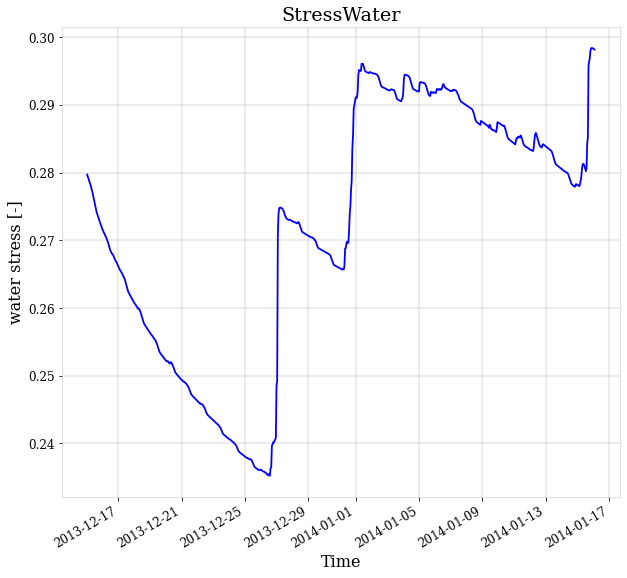

In [83]:
fig = plt.figure(figsize=(10,14/1.618))
ds.StressWater.plot(linewidth=1.8,color='blue')
plt.title('StressWater')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

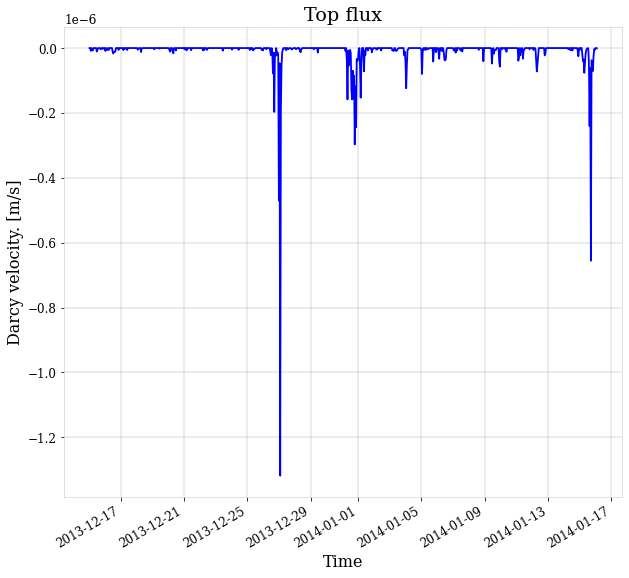

In [84]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

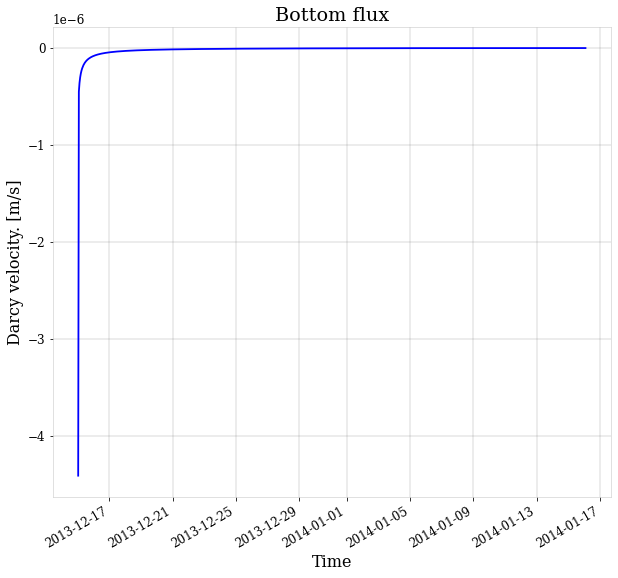

In [85]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

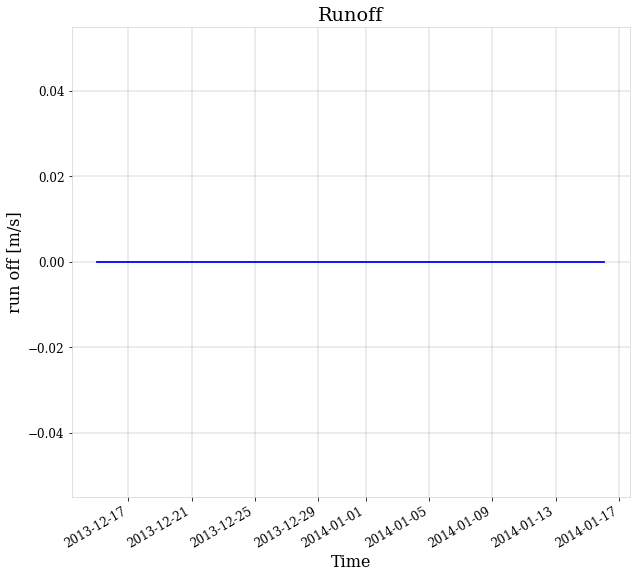

In [86]:
fig = plt.figure(figsize=(10,14/1.618))
ds.runOff.plot(linewidth=1.8,color='blue')
plt.title('Runoff')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

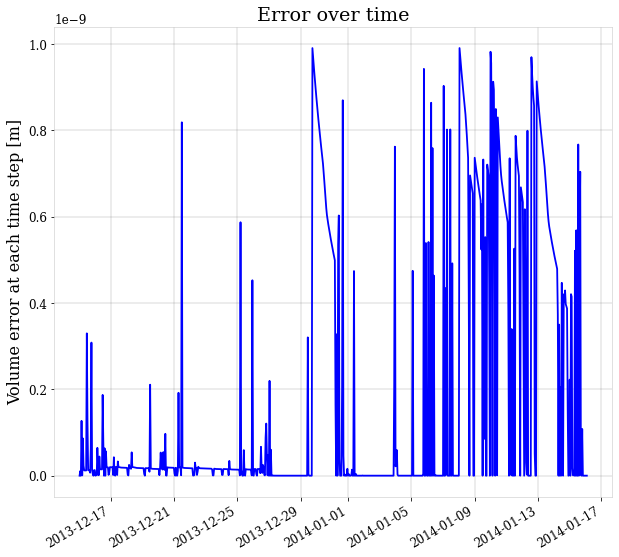

In [87]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

<br>

# Plot Evapotranspiration

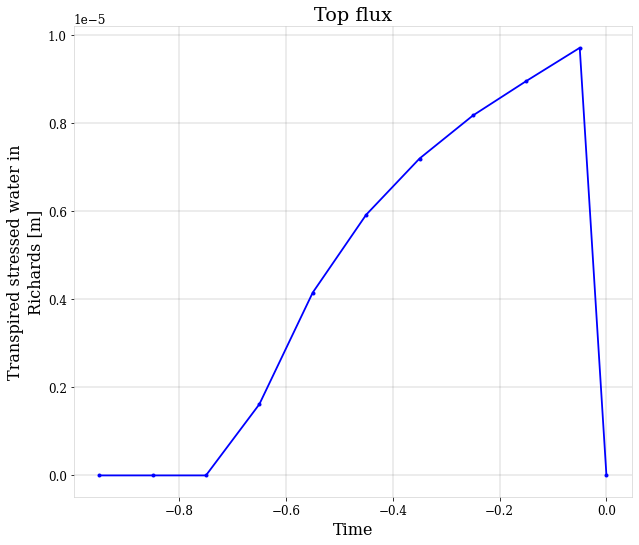

In [128]:
fig = plt.figure(figsize=(10,14/1.618))
ds.ets.sel(depth=ds.depth[:], time=ds.time.values[11]).plot(linewidth=1.8,color='blue',marker = '.')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

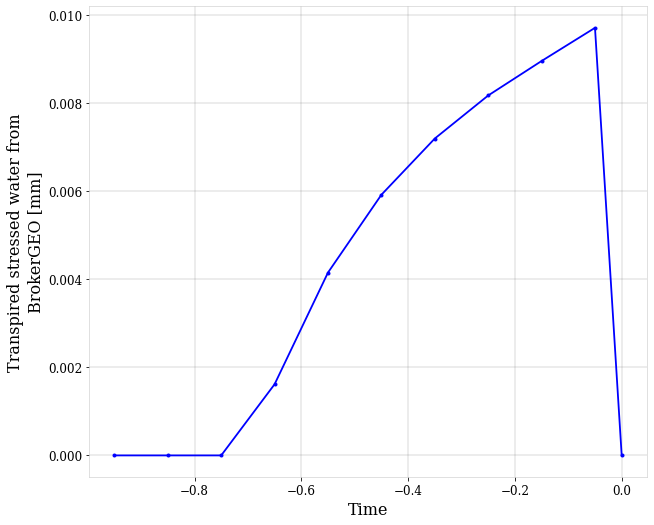

In [129]:
fig = plt.figure(figsize=(10,14/1.618))
ds.StressedETs.sel(depth=ds.depth[:], time=ds.time.values[10]).plot(linewidth=1.8,color='blue',marker = '.')
plt.title('')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In [130]:
etsRichards=(ds.ets.sel(depth=ds.depth[:], time=ds.time.values[11]).values)*1000
etsRichards

array([0.        , 0.        , 0.        , 0.00161654, 0.00415215,
       0.00591851, 0.00719505, 0.00817261, 0.00895553, 0.00970883,
       0.        ])

In [131]:
etsBroker=(ds.StressedETs.sel(depth=ds.depth[:], time=ds.time.values[10]).values)
etsBroker


array([0.        , 0.        , 0.        , 0.00161654, 0.00415215,
       0.00591851, 0.00719505, 0.00817261, 0.00895553, 0.00970883,
       0.        ])

In [132]:
diff=etsRichards-etsBroker
diff

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

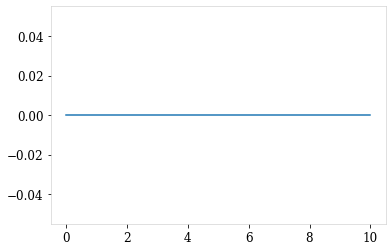

In [133]:
plt.plot(diff)

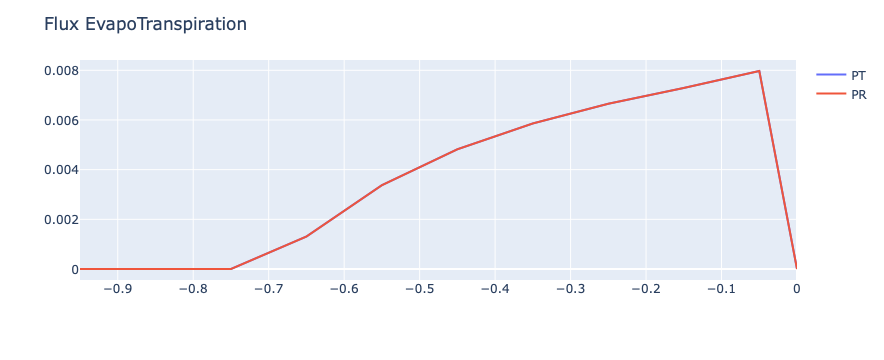

In [136]:
fig = px.line()
fig.add_trace(go.Scatter(x=ds.depth[:], y=(ds.ets.sel(depth=ds.depth[:], time=ds.time.values[13]))*1000, mode='lines', name='PT'))
fig.add_trace(go.Scatter(x=ds.depth[:], y=ds.StressedETs.sel(depth=ds.depth[:], time=ds.time.values[12]), mode='lines', name='PR'))


fig.update_layout(title= 'Flux EvapoTranspiration')
fig.show()

In [ ]:
os.chdir(project_path+'/output/GEOSPACE')
os.listdir()

In [ ]:
df = pd.read_csv('FluxEvapoTranspiration_PT_waterstress__test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','[W/m2]']

fig = px.line(df, x='Datetime', y='[W/m2]', title='EvapoTranspiration - PriestleyTaylor [W/m2]')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df1 = pd.read_csv('EvapoTranspiration_PT_waterstress__test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Datetime','[mm]']

fig = px.line(df1, x='Datetime', y='[mm]', title='EvapoTranspiration - PriestleyTaylor [mm]')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
#show_stress('EvapoTranspiration_1_potential_0710_01.csv',
 #           'EvapoTranspiration_1_environmentalstress_0710_01.csv',
  #          'EvapoTranspiration_1_totalstress_0710_01.csv',
   #         'EvapoTranspiration_1_waterstress_0710_01.csv',)

In [ ]:
#df2 = pd.read_csv('FluxEvapoTranspiration_PR_waterstress__test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
#df2.columns = ['Datetime','EvapoTranspirationPR']

#fig = px.line(df2, x='Datetime', y='EvapoTranspirationPR', title='Flux EvapoTranspirationPR')
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()

In [118]:
#fig = px.line()
#fig.add_trace(go.Scatter(x=df['Datetime'], y=df['[W/m2]'], mode='lines', name='PT'))
#fig.add_trace(go.Scatter(x=df['Datetime'], y=df2['EvapoTranspirationPR'], mode='lines', name='PR'))


#fig.update_layout(title= 'Flux EvapoTranspiration')
#fig.show()